# Demostration for the analysis of Emotion EEG dataset in *Pyhton*

In [1]:
%matplotlib
import os
import mne
from mne.viz import plot_topomap
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch, psd_array_multitaper
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using matplotlib backend: Qt5Agg


# Part 1: Import the preprocessed data and epochs operation

## The emotion EEG dataset have been preprocessed in EEGLAB and stored as *.set* file format

In [2]:
# Use the mne.read_epochs_eeglab() to read the preprocessed data
demo = mne.read_epochs_eeglab('F:/1_Emotion_Data/EEG/Angry/sub_001_ag1.set')

Extracting parameters from F:/1_Emotion_Data/EEG/Angry/sub_001_ag1.set...
Not setting metadata
Not setting metadata
274 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_50628/2515288661.py:2: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  demo = mne.read_epochs_eeglab('F:/1_Emotion_Data/EEG/Angry/sub_001_ag1.set')


In [3]:
# The demo data stored as EpochsEEGLAB format, first have a look of its basic info
print(demo.info)
# The channel names
print(demo.ch_names)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 250.0 Hz
>
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'FT9', 'FT10', 'TP9', 'TP10', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'Oz']


In [27]:
# We can convert the data to numnpy array
demo_data = demo.get_data()
print(demo_data.shape)
# The data shape is (274, 63, 250), which is (epochs, channels, datapoints)

(274, 63, 250)


In [5]:
# We can also convert the epochs to dataframe
df = demo.to_data_frame()
print(df)

       time condition  epoch        Fp1       Fp2        F3        F4  \
0         0  1/S  2/1      0  -4.276820  1.498513 -3.658590  3.001526   
1         4  1/S  2/1      0   5.057670  6.503774 -0.328080  5.225348   
2         8  1/S  2/1      0   6.118948  7.434645  2.550337  7.360086   
3        12  1/S  2/1      0  -1.630495  3.781933  4.265198  8.202976   
4        16  1/S  2/1      0 -12.171272 -1.695163  4.603967  6.529309   
...     ...       ...    ...        ...       ...       ...       ...   
68495   980         1    273  -2.483882 -1.333642  0.620091  4.854822   
68496   984         1    273  -0.667888 -1.334733  0.311050  1.600081   
68497   988         1    273   1.177035 -1.689624 -0.954936 -2.567706   
68498   992         1    273   1.157053 -1.875612 -1.305312 -4.015029   
68499   996         1    273  -0.112460 -1.253944 -0.473852 -2.187762   

             C3        C4        P3  ...       FT7       FT8        TP7  \
0     -3.931910  2.079292 -1.202695  ...  0.5753

In [6]:
# Indexing the epochs, which can based on the events for the epoch sequence, the current dataset maybe a special case that we don't have specific events, what we care is the sequence of the epoch
a = demo[50] #e.g., the 50th epoch in the demo data
b = demo[60] #e.g., the 60th epoch in the demo data

# Part 2: Import and apply the channel location file for further topoplot

## Import the channel location file using the mne function for reading montage

In [3]:
montage = mne.channels.read_custom_montage('F:/1_Emotion_Data/EEG/Emotion.loc')
# Let's plot the montage in both 2-D topo-form and 3-D from
montage.plot(kind='3d')
montage.plot(kind='topomap', sphere=0.12)
plt.savefig('F:/1_Emotion_Data/EEG/Emotion_montage.png', bbox_inches='tight',dpi=600,pad_inches=0.1)


Creating RawArray with float64 data, n_channels=63, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.
Creating RawArray with float64 data, n_channels=63, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


In [4]:
# Apply the montage file to the demo data
demo.set_montage(montage)

Number of events,274
Events,1: 11/1: 2711/S 2/1: 1S 2/1/1: 1
Time range,0.000 – 0.996 sec
Baseline,off


In [5]:
# Channel indexing
# Obtain the channel names as a list
ch_names = demo.ch_names
# Crate a index list for channels
ch_idx = list(range(63))
# Combine the channels and index and convert to a dict
ch_names = dict(zip(ch_names, ch_idx))
print(ch_names['Fpz'])

59


# Part 3 : Basic plot of the epoch data

## In this part, we will demonstrate some basic plots for the EEG data

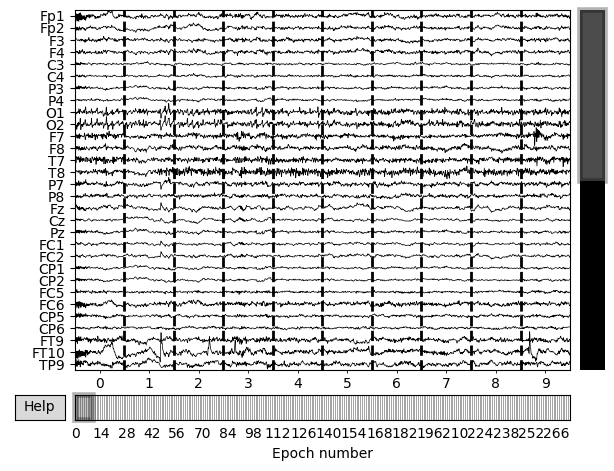

In [10]:
# Plot the data(scroll)
demo.plot(n_epochs=10, n_channels=30)

    Using multitaper spectrum estimation with 7 DPSS windows


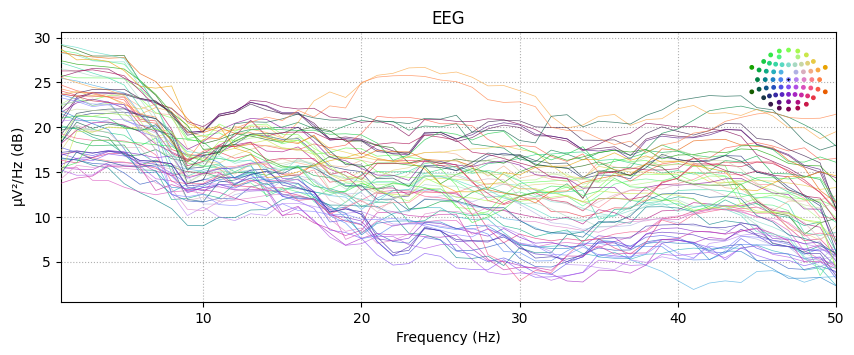

In [11]:
# Plot the power spectral plot
a.plot_psd(fmin=1, fmax=50)


    Using multitaper spectrum estimation with 7 DPSS windows


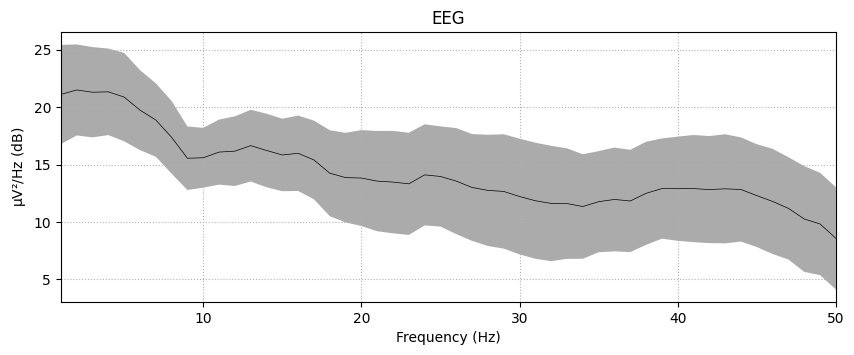

In [12]:
a.plot_psd(fmin=1, fmax=50, average=True)

    Using multitaper spectrum estimation with 7 DPSS windows


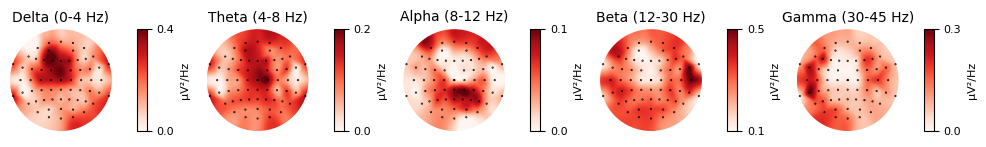

In [13]:
# Plot the topomap of power spectral distribution
a.plot_psd_topomap(normalize=True)


In [14]:
# Plot topomap of one datapoint
d_topo = np.squeeze(data[50,:,:]) # Select one epoch and reshape it to (63,250) => channels*datapoints, please be noted that the input for topoplot should be numpy array
plot_topomap(d_topo[:,100], demo.info) # Select one datapoint to plot


(<matplotlib.image.AxesImage at 0x1bfcf6d8610>,
 <matplotlib.contour.QuadContourSet at 0x1bfcf6d87c0>)

# Part 4: Further processing

## 1. Conducting the PSD analysis by using the Multitapper method

In [7]:
psds, freqs= psd_multitaper(a, fmin=1, fmax=50) 
# Result for PSD, structure: n_epochs*n_channels*frequencies
print(psds.shape) 
# Print the values for different frequencies 
print(psds) 
# Transform the PSD value to dB
psds = 10* np.log10(10**12*psds)

    Using multitaper spectrum estimation with 7 DPSS windows
(1, 63, 50)
[[[3.79321511e-10 3.55719440e-10 3.55221119e-10 ... 1.54381910e-11
   1.55322765e-11 1.28630061e-11]
  [7.24498114e-11 1.37286860e-10 1.32546991e-10 ... 9.31295047e-12
   8.78909703e-12 2.71763696e-12]
  [5.24151427e-10 4.61607142e-10 4.02364900e-10 ... 6.66777098e-12
   6.24939547e-12 6.73243872e-12]
  ...
  [5.07997855e-11 4.47389895e-11 4.23353041e-11 ... 2.86112312e-12
   3.16248133e-12 2.38567698e-12]
  [1.45607857e-10 1.86904361e-10 2.05613413e-10 ... 1.22982558e-11
   1.22199220e-11 4.94513261e-12]
  [3.65899823e-10 4.12904482e-10 4.52350565e-10 ... 2.77433823e-11
   3.20463156e-11 2.74219705e-11]]]


In [8]:
# Plot the PSD
f, ax = plt.subplots()
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD (gradiometers)', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()
plt.savefig('F:/1_Emotion_Data/EEG/PSD.png',bbox_inches='tight',dpi=600,pad_inches=0.1)
plt.close()

In [17]:
# Create the frequency-band index
delta = freqs[0:4];theta = freqs[3:7]; alpha = freqs[7:13]; beta = freqs[13:30]; gamma = freqs[30:45]; 

In [18]:
# Plot the topomap of specific frequency band
alpha = np.average(np.squeeze(psds)[:,13:30],axis=1); print(alpha)
plot_topomap(alpha, demo.info, vmin=7, sphere= 0.13)
plt.savefig('F:/1_Emotion_Data/EEG/Topos/topo.png',bbox_inches='tight',dpi=600,pad_inches=0.1)

[15.75494908 14.1932072  13.9215641  15.03562461 10.13029778 10.12288548
  9.47131811  8.81166897 19.41364346 18.20235928 18.85644546 17.62562903
 19.55015566 23.57124021 16.58545789 14.65426359 14.44823002  9.43505082
  9.98385379 12.2225304  12.37995323  8.24265669  7.34470069 11.41818327
 16.01678258 12.69999934 10.73420898 15.46556358 15.05359264 17.59412783
 16.43582541 13.46872538 13.57308051  9.41308714  9.77342694  9.40970418
  8.00267256 13.27398014 15.43881531 10.72372562 13.19900774  9.06506658
  9.97811938 19.45918847 13.67287308 14.48575947 15.70622986  9.03666833
 13.20632377 15.89616185 11.2178364  12.97924379 14.60673859 13.19351828
 24.11745905 20.53715175 19.16375312 19.49697504 15.06384138 14.96550737
  7.214084   16.63747813 21.00265373]


## 2. Calculate the variability of PSD features

In [5]:
# Channel indexing
# Obtain the channel names as a list
ch_names = demo.ch_names
# Crate a index list for channels
ch_idx = list(range(63))
# Combine the channels and index and convert to a dict
ch_names = dict(zip(ch_names, ch_idx))
print(ch_names['Fpz'])


59


## Frequency-band index
## delta = freqs[0:4]; theta = freqs[3:7]; alpha = freqs[7:13]; beta = freqs[13:30]; gamma = freqs[30:45]; 

In [ ]:
def delta_vara(data, ch_vara):
    delta_corr = np.zeros((250,4))
    for i in range(24,274):
        epoch = data[i]
        psds, freqs = psd_multitaper(epoch,fmin=1, fmax=50)
        psds = 10* np.log10(10**12*psds)
        delta = np.squeeze(psds)[ch_vara,0:4]
        delta_corr[i-24] = delta

    simi = np.mean(np.triu(np.corrcoef(delta_corr)))
    vara = 1 - simi
    return np.array([simi,vara])

def theta_vara(data, ch_vara):
    theta_corr = np.zeros((250,4))
    for i in range(24,274):
        epoch = data[i]
        psds, freqs = psd_multitaper(epoch,fmin=1, fmax=50)
        psds = 10* np.log10(10**12*psds)
        theta = np.squeeze(psds)[ch_vara,3:7]
        theta_corr[i-24] = theta

    simi = np.mean(np.triu(np.corrcoef(theta_corr)))
    vara = 1 - simi
    return np.array([simi,vara])

def alpha_vara(data, ch_vara):
    alpha_corr = np.zeros((250,6))
    for i in range(24,274):
        epoch = data[i]
        psds, freqs = psd_multitaper(epoch,fmin=1, fmax=50)
        psds = 10* np.log10(10**12*psds)
        alpha = np.squeeze(psds)[ch_vara,7:13]
        alpha_corr[i-24] = alpha

    simi = np.mean(np.triu(np.corrcoef(alpha_corr)))
    vara = 1 - simi
    return np.array([simi,vara])

def beta_vara(data, ch_vara):
    beta_corr = np.zeros((250,17))
    for i in range(24,274):
        epoch = data[i]
        psds, freqs = psd_multitaper(epoch,fmin=1, fmax=50)
        psds = 10* np.log10(10**12*psds)
        beta = np.squeeze(psds)[ch_vara,13:30]
        beta_corr[i-24] = beta

    simi = np.mean(np.triu(np.corrcoef(beta_corr)))
    vara = 1 - simi
    return np.array([simi,vara])

def gamma_vara(data, ch_vara):
    gamma_corr = np.zeros((250,15))
    for i in range(24,274):
        epoch = data[i]
        psds, freqs = psd_multitaper(epoch,fmin=1, fmax=50)
        psds = 10* np.log10(10**12*psds)
        gamma = np.squeeze(psds)[ch_vara,30:45]
        gamma_corr[i-24] = gamma

    simi = np.mean(np.triu(np.corrcoef(gamma_corr)))
    vara = 1 - simi
    return np.array([simi,vara])

cor = gamma_vara(demo,13)

In [ ]:
# Plot the correlation matrix
sns.heatmap(np.corrcoef(cor), cmap='Blues', square=True)
plt.savefig('F:/1_Emotion_Data/EEG/COR_DEMO.png',bbox_inches='tight',dpi=600,pad_inches=0.1)

In [7]:
delta_sv = np.zeros((63,2))
theta_sv = np.zeros((63,2))
alpha_sv = np.zeros((63,2))
beta_sv = np.zeros((63,2))
gamma_sv = np.zeros((63,2))

In [8]:
for j in range(len(ch_idx)):
    #d_sv = delta_vara(demo,j); delta_sv[j] = d_sv    
    #t_sv = theta_vara(demo,j); theta_sv[j] = t_sv
    #a_sv = alpha_vara(demo,j); alpha_sv[j] = a_sv
    #b_sv = beta_vara(demo,j); beta_sv[j] = b_sv
    #g_sv = gamma_vara(demo,j); gamma_sv[j] = g_sv
    

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

In [10]:
plot_topomap(beta_sv[:,1],demo.info, vmin=0.8, sphere=0.13)
plt.savefig('F:/1_Emotion_Data/EEG/beta_vara.png',bbox_inches='tight',dpi=600,pad_inches=0.1)